In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 15

In [25]:
# Usefull paths and variables

data_path = Path(".")
data_apartado1 = Path('../Apartado1')

elements = ['F18', 'C11', 'N13', 'O15', 'Ga68', 'Rb82']

In [33]:
def medias_hardcoded(write=False, path=None):
	data_medias = {
		'Isótopo': ['F18', 'C11', 'N13', 'O15', 'Ga68', 'Rb82'],
		'Media (keV)': [254, 385, 493, 740, 838, 1534],
		'Error (keV)': [1, 2, 2, 3, 3, 5]
	}

	data_medias = pd.DataFrame(data_medias)

	if write:
		data_medias.to_csv(path, index=False)

	return data_medias

In [16]:
def move_data(dest_path):
	his_files = list(data_path.glob('*.his'))
	sal_files = list(data_path.glob('*.SAL'))
	out_files = list(data_path.glob('*.out'))

	for file in his_files + sal_files + out_files:
		file.rename(dest_path / file.name)

	return

In [17]:
def output(simbolo, E, dest_path):
	dest_path.mkdir(exist_ok=True)
	input_text = dest_path / 'input_data.txt'
	with open(input_text, 'w') as file:
		file.write(f'Elemento = {simbolo}\n')
		file.write('\n*************************************\n')
		file.write('Emisión de positrones con energía:\n')
		file.write(f'E = {E} MeV\n')
		file.write('\n*************************************\n')

	move_data(dest_path)

	return

In [34]:
data_medias = medias_hardcoded(write=True, path=data_path / 'data_medias.csv')

In [40]:
simbolo = 'C11'
E = data_medias.loc[data_medias['Isótopo'] == simbolo, 'Media (keV)'].values[0] / 1000
print(f'Elemento: {simbolo}\nEnergía: {E} MeV')

Elemento: C11
Energía: 0.385 MeV


In [46]:
dest_path = data_path / simbolo
output(simbolo=simbolo, E=E, dest_path=dest_path)

In [52]:
columns = ['Energía', 'Cuentas', 'Error']
skiprows = 1
file_name = 'ini-ene.his'
sep=r'\s+'

f18 = pd.read_csv(data_apartado1 / 'F18' / file_name, sep=r'\s+', skiprows=skiprows, names=columns)
c11 = pd.read_csv(data_apartado1 / 'C11' / file_name, sep=r'\s+', skiprows=skiprows, names=columns)

In [53]:
f18_positrons = pd.read_csv(data_path / 'F18' / file_name, sep=sep, skiprows=skiprows, names=columns)
c11_positrons = pd.read_csv(data_path / 'C11' / file_name, sep=sep, skiprows=skiprows, names=columns)

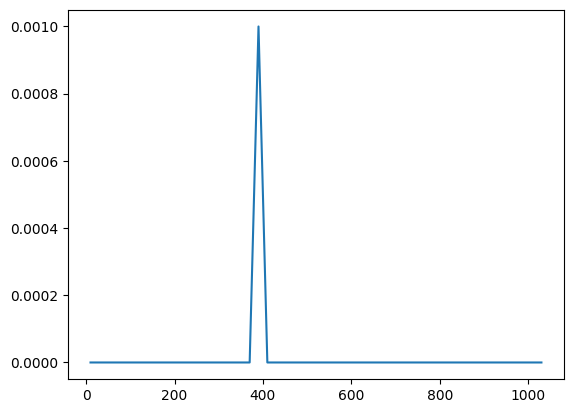

In [54]:
plt.plot(c11_positrons['Energía'], c11_positrons['Cuentas'])